In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classes.Learning_module_2d import LearningModule
import math


In [2]:

GP = LearningModule(3)
objective=10
dataset2 = np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP2.npy')

dataset1 =  np.load('C:/Users/mahdi/Desktop/MPC/MPCExperiments/datasetGP.npy')
GP.read_data_action(dataset1, objective)
GP.read_data_action2(dataset2,objective)


all_dataset_shape= (2060,)
grouped_dataset_shape= (1207,)


a0_x: [[13.72171157]]
D_x: [0.54493189]
a0_y: [[17.18550816]]
D_y: [0.63725608]
a0_y: [[-17.18550816]]
D_y: [-0.63725608]


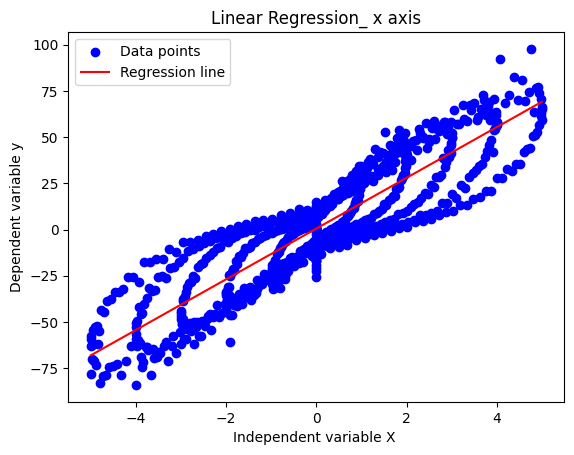

a0_y: [[-17.18550816]]
D_y: [-0.63725608]


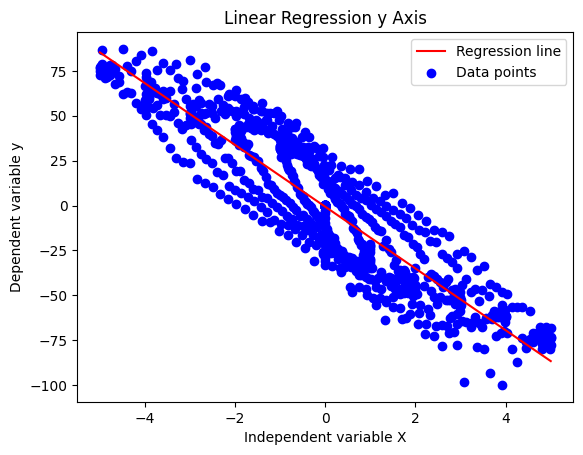

a0================= 15.453609862827808
a0_est= 15.453609862827808
GP Learning Complete!
r^2 are 0.9711314233236987 and 0.9703319525946931
Trainig completed


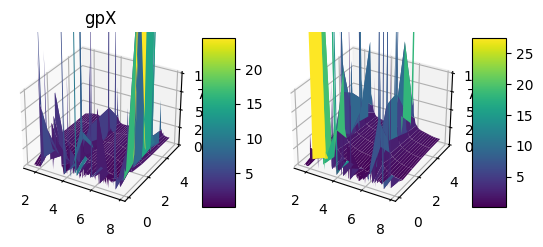

In [3]:
GP.estimate_a0(0)
# GP.load_GP()

c:\Users\mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


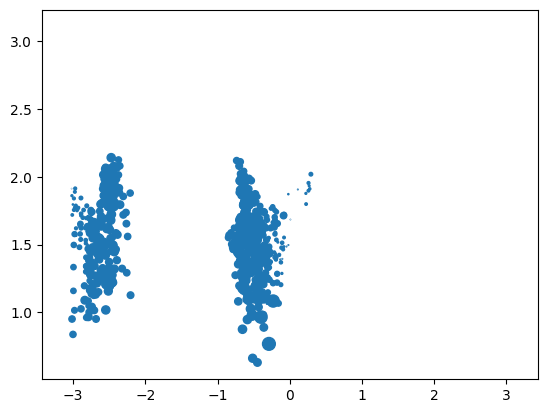

In [4]:
plt.scatter(GP.alpha_infinity, GP.freq_infinity, GP.vy_infinity)

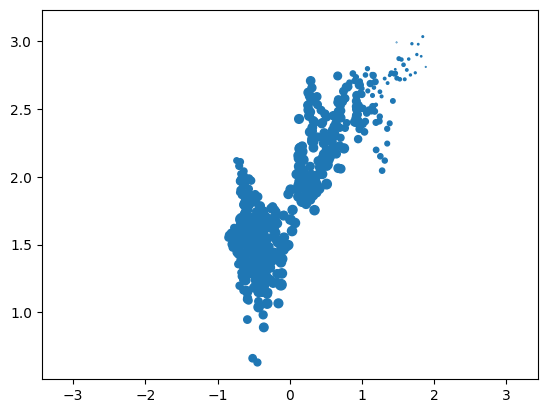

In [5]:
plt.scatter(GP.alpha_infinity, GP.freq_infinity, GP.vx_infinity)

In [6]:

def model_error(vx_ls, vy_ls, alpha_ls, freq_ls):
    ex_gp_ls = []
    ey_gp_ls = []
    ex_lm_ls = []
    ey_lm_ls = []
    sigX_ls = []
    sigY_ls = []
    vx_gp_ls, vy_gp_ls, vx_lm_ls, vy_lm_ls = [],[],[],[]
    for i in range(1,len(vx_ls)-1):
        v_gp,v_lm, sig = GP.dyn_model(alpha_ls[i],freq_ls[i])
        vx_gp, vy_gp , vx_lm, vy_lm = v_gp[0][0], v_gp[1][0], v_lm[0], v_lm[1]
        vx_gp_ls.append(vx_gp)
        vy_gp_ls.append(vy_gp)
        vx_lm_ls.append(vx_lm)
        vy_lm_ls.append(vy_lm)
        sigX_ls.append(sig[0])
        sigY_ls.append(sig[1])
        vx = vx_ls[i]
        vy = vy_ls[i]


        ex_gp = np.abs(vx-vx_gp)
        ey_gp = np.abs(vy-vy_gp)
        ex_lm = np.abs(vx-vx_lm)
        ey_lm = np.abs(vy-vy_lm)
        ex_gp_ls.append(ex_gp)
        ey_gp_ls.append(ey_gp)
        ex_lm_ls.append(ex_lm)
        ey_lm_ls.append(ey_lm)
    return np.array(vx_gp_ls), np.array(vy_gp_ls), np.array(vx_lm_ls), np.array(vy_lm_ls)


In [7]:
vx_gp_ls1, vy_gp_ls1, vx_lm_ls1, vy_lm_ls1 = model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

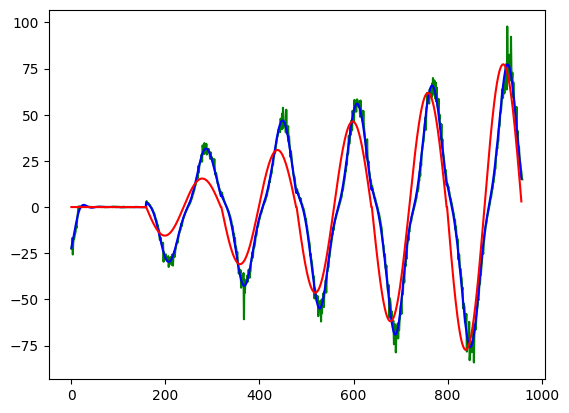

In [8]:
plt.plot(GP.vx_grid.flatten(),'green')
plt.plot(vx_gp_ls1,'blue')
plt.plot(vx_lm_ls1,'red')


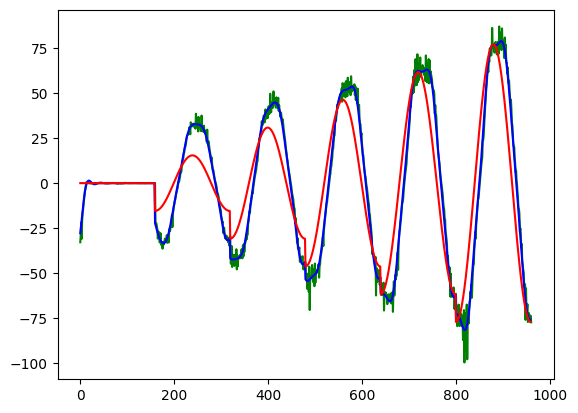

In [9]:
plt.plot(GP.vy_grid.flatten(),'green')
plt.plot(vy_gp_ls1,'blue')
plt.plot(vy_lm_ls1,'red')


In [10]:
vx_gp_ls2, vy_gp_ls2, vx_lm_ls2, vy_lm_ls2 = model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())


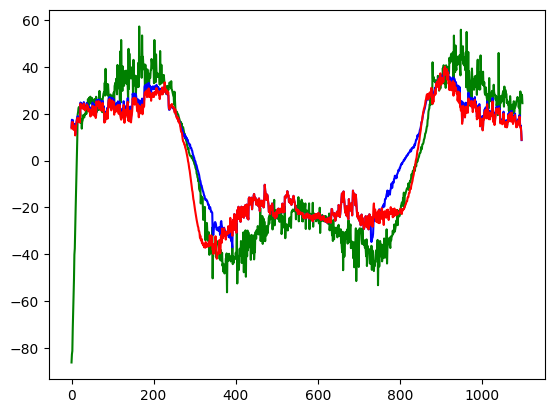

In [11]:
plt.plot(GP.vx_infinity.flatten(),'green')
plt.plot(vx_gp_ls2,'blue')
plt.plot(vx_lm_ls2,'red')

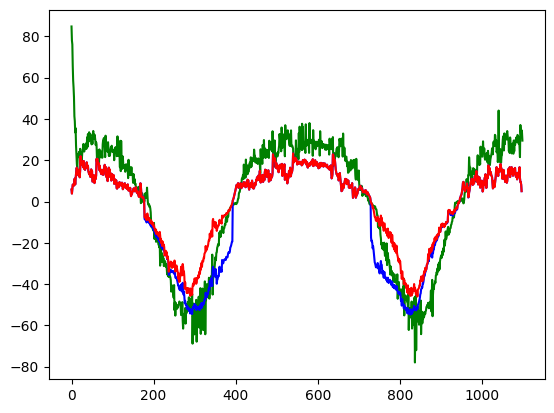

In [12]:
plt.plot(GP.vy_infinity.flatten(),'green')
plt.plot(vy_gp_ls2,'blue')
plt.plot(vy_lm_ls2,'red')

reacehd here 2
a0_x: [[15.61438851]]
D_x: [0.09668667]
a0_y: [[18.862976]]
D_y: [-0.8506682]
a0_y: [[-18.862976]]
D_y: [0.8506682]


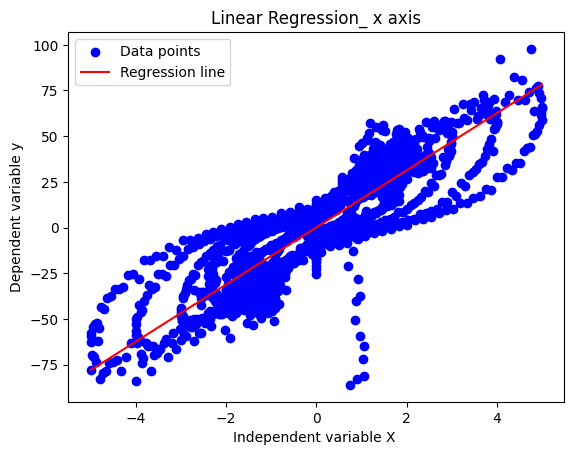

a0_y: [[-18.862976]]
D_y: [0.8506682]


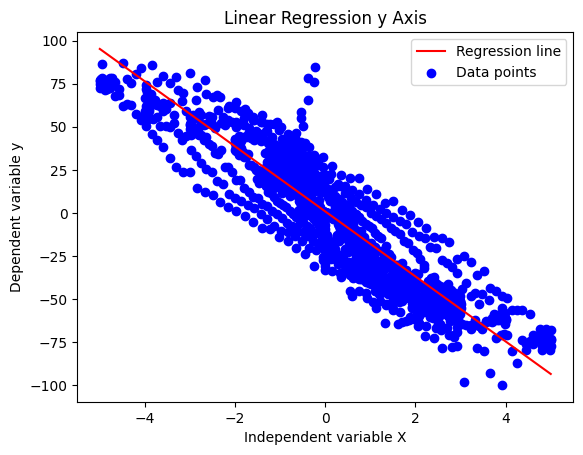

a0================= 17.2386822530847
a0_est= 17.2386822530847
GP Learning Complete!
r^2 are 0.7587515685889679 and 0.8912051874413183
Trainig completed


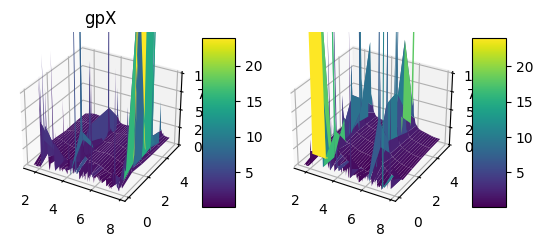

In [13]:
GP.estimate_a0(1)

In [14]:
vx_gp_ls3, vy_gp_ls3, vx_lm_ls3, vy_lm_ls3 = model_error(GP.vx_infinity.flatten(), GP.vy_infinity.flatten(), GP.alpha_infinity.flatten(), GP.freq_infinity.flatten())

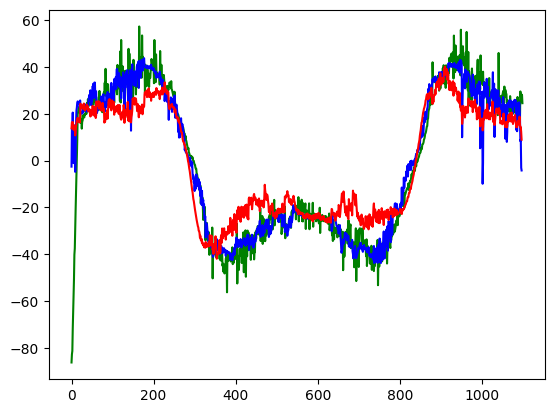

In [15]:
plt.plot(GP.vx_infinity.flatten(),'green')
plt.plot(vx_gp_ls3,'blue')
plt.plot(vx_lm_ls3,'red')

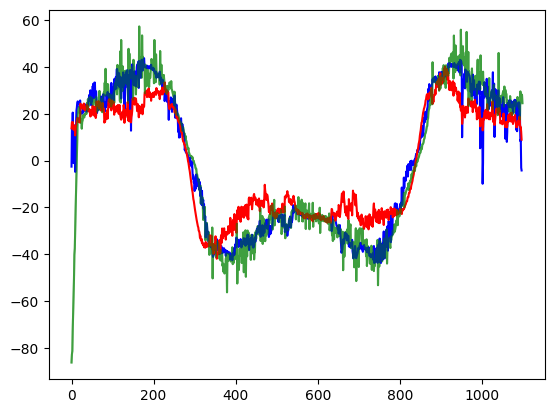

In [24]:
plt.plot(GP.vx_infinity.flatten(),'green', alpha = 0.5)
plt.plot(vx_gp_ls3,'blue')
plt.plot(vx_lm_ls3,'red')
plt.plot(GP.vx_infinity.flatten(),'green', alpha = 0.5)

In [17]:
vx_gp_ls4, vy_gp_ls4, vx_lm_ls4, vy_lm_ls4 = model_error(GP.vx_grid.flatten(), GP.vy_grid.flatten(), GP.alpha_grid.flatten(), GP.freq_grid.flatten())

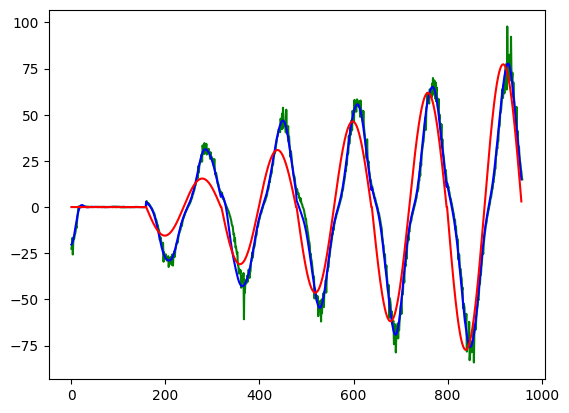

In [18]:
plt.plot(GP.vx_grid.flatten(),'green')
plt.plot(vx_gp_ls4,'blue')
plt.plot(vx_lm_ls4,'red')

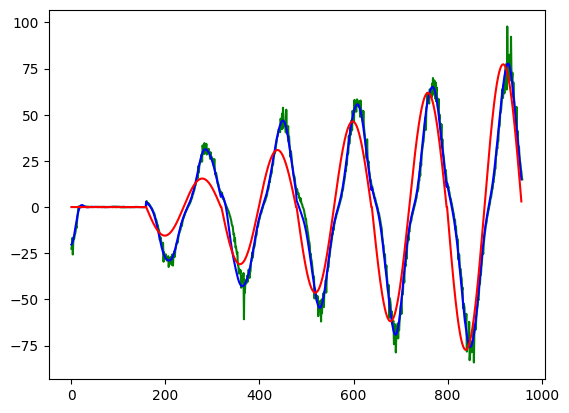

In [19]:
plt.plot(GP.vx_grid.flatten(),'green')
plt.plot(vx_gp_ls4,'blue')
plt.plot(vx_lm_ls4,'red')

In [20]:
# import pandas as pd
# import numpy as np

# # Assuming your data is in a DataFrame called df
# # df = pd.read_csv('your_data.csv') # or however you load your data

# # Example data

# df = pd.DataFrame(data)

# # Define the bin size
# alpha_bin_size = 0.5
# freq_bin_size = 0.5

# # Create bins
# df['alpha_bin'] = (df['alpha'] / alpha_bin_size).astype(int)
# df['freq_bin'] = (df['freq'] / freq_bin_size).astype(int)

# # Group by the bins and calculate the mean vx for each group
# grouped = df.groupby(['alpha_bin', 'freq_bin']).agg({
#     'alpha': 'mean',
#     'freq': 'mean',
#     'vx': 'mean'
# }).reset_index()

# # Drop the bin columns
# grouped = grouped.drop(columns=['alpha_bin', 'freq_bin'])

# # Save or use the grouped data
# # grouped.to_csv('grouped_data.csv', index=False)

# # If you want to visualize the simplified data
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(grouped['alpha'], grouped['freq'], grouped['vx'], c='r', marker='o')

# ax.set_xlabel('Alpha')
# ax.set_ylabel('Freq')
# ax.set_zlabel('Vx')

# plt.show()
